# Purpose: to explore the BU projects to decide which data to include and omit from the training set. 
There are three splits of the data to consider. 
1. The training data used to train the model. 
2. The validaion data used during model evaluation.
3. The test data used to evaluate the final model. This will be withheld during the training process.

![Screenshot 2023-10-18 at 08.34.45.png](<attachment:Screenshot 2023-10-18 at 08.34.45.png>)


The final model will be run on soundscape recordings, so the model needs to be evaluated on soundscape recordings.
In addition, the model will be trained on short audio clips, so part of the evaluation process will look at how the model is performing on these clips.

### Proposed split options:
1. Split the training, validation and test sets by ARU location ID. 
    This will have the advantage of making sure that the recordings all come from different locations, and so the model will not be overfit to the specifics of a particular location.
2. Split the training, validation and test sets by geographic area.
    This will have the advantage of making sure that the recordings all come from different geographic regions, and so we may get an idea of how the model will generalize to other regions outside of the training area.
3. Randomly shuffle all the data and split into training, validation and test sets. This is the simplest method and will be used as a baseline.
4. There are many more ways to split the data, by date of recording we would get an idea of how the model performs on recent time windows, which could be relevant if the environmental noise or another factof is changing over time. 
If any of these options are chosen, the final use case of the model should be considered, in order to make sure that the final report is relevant to the use case.




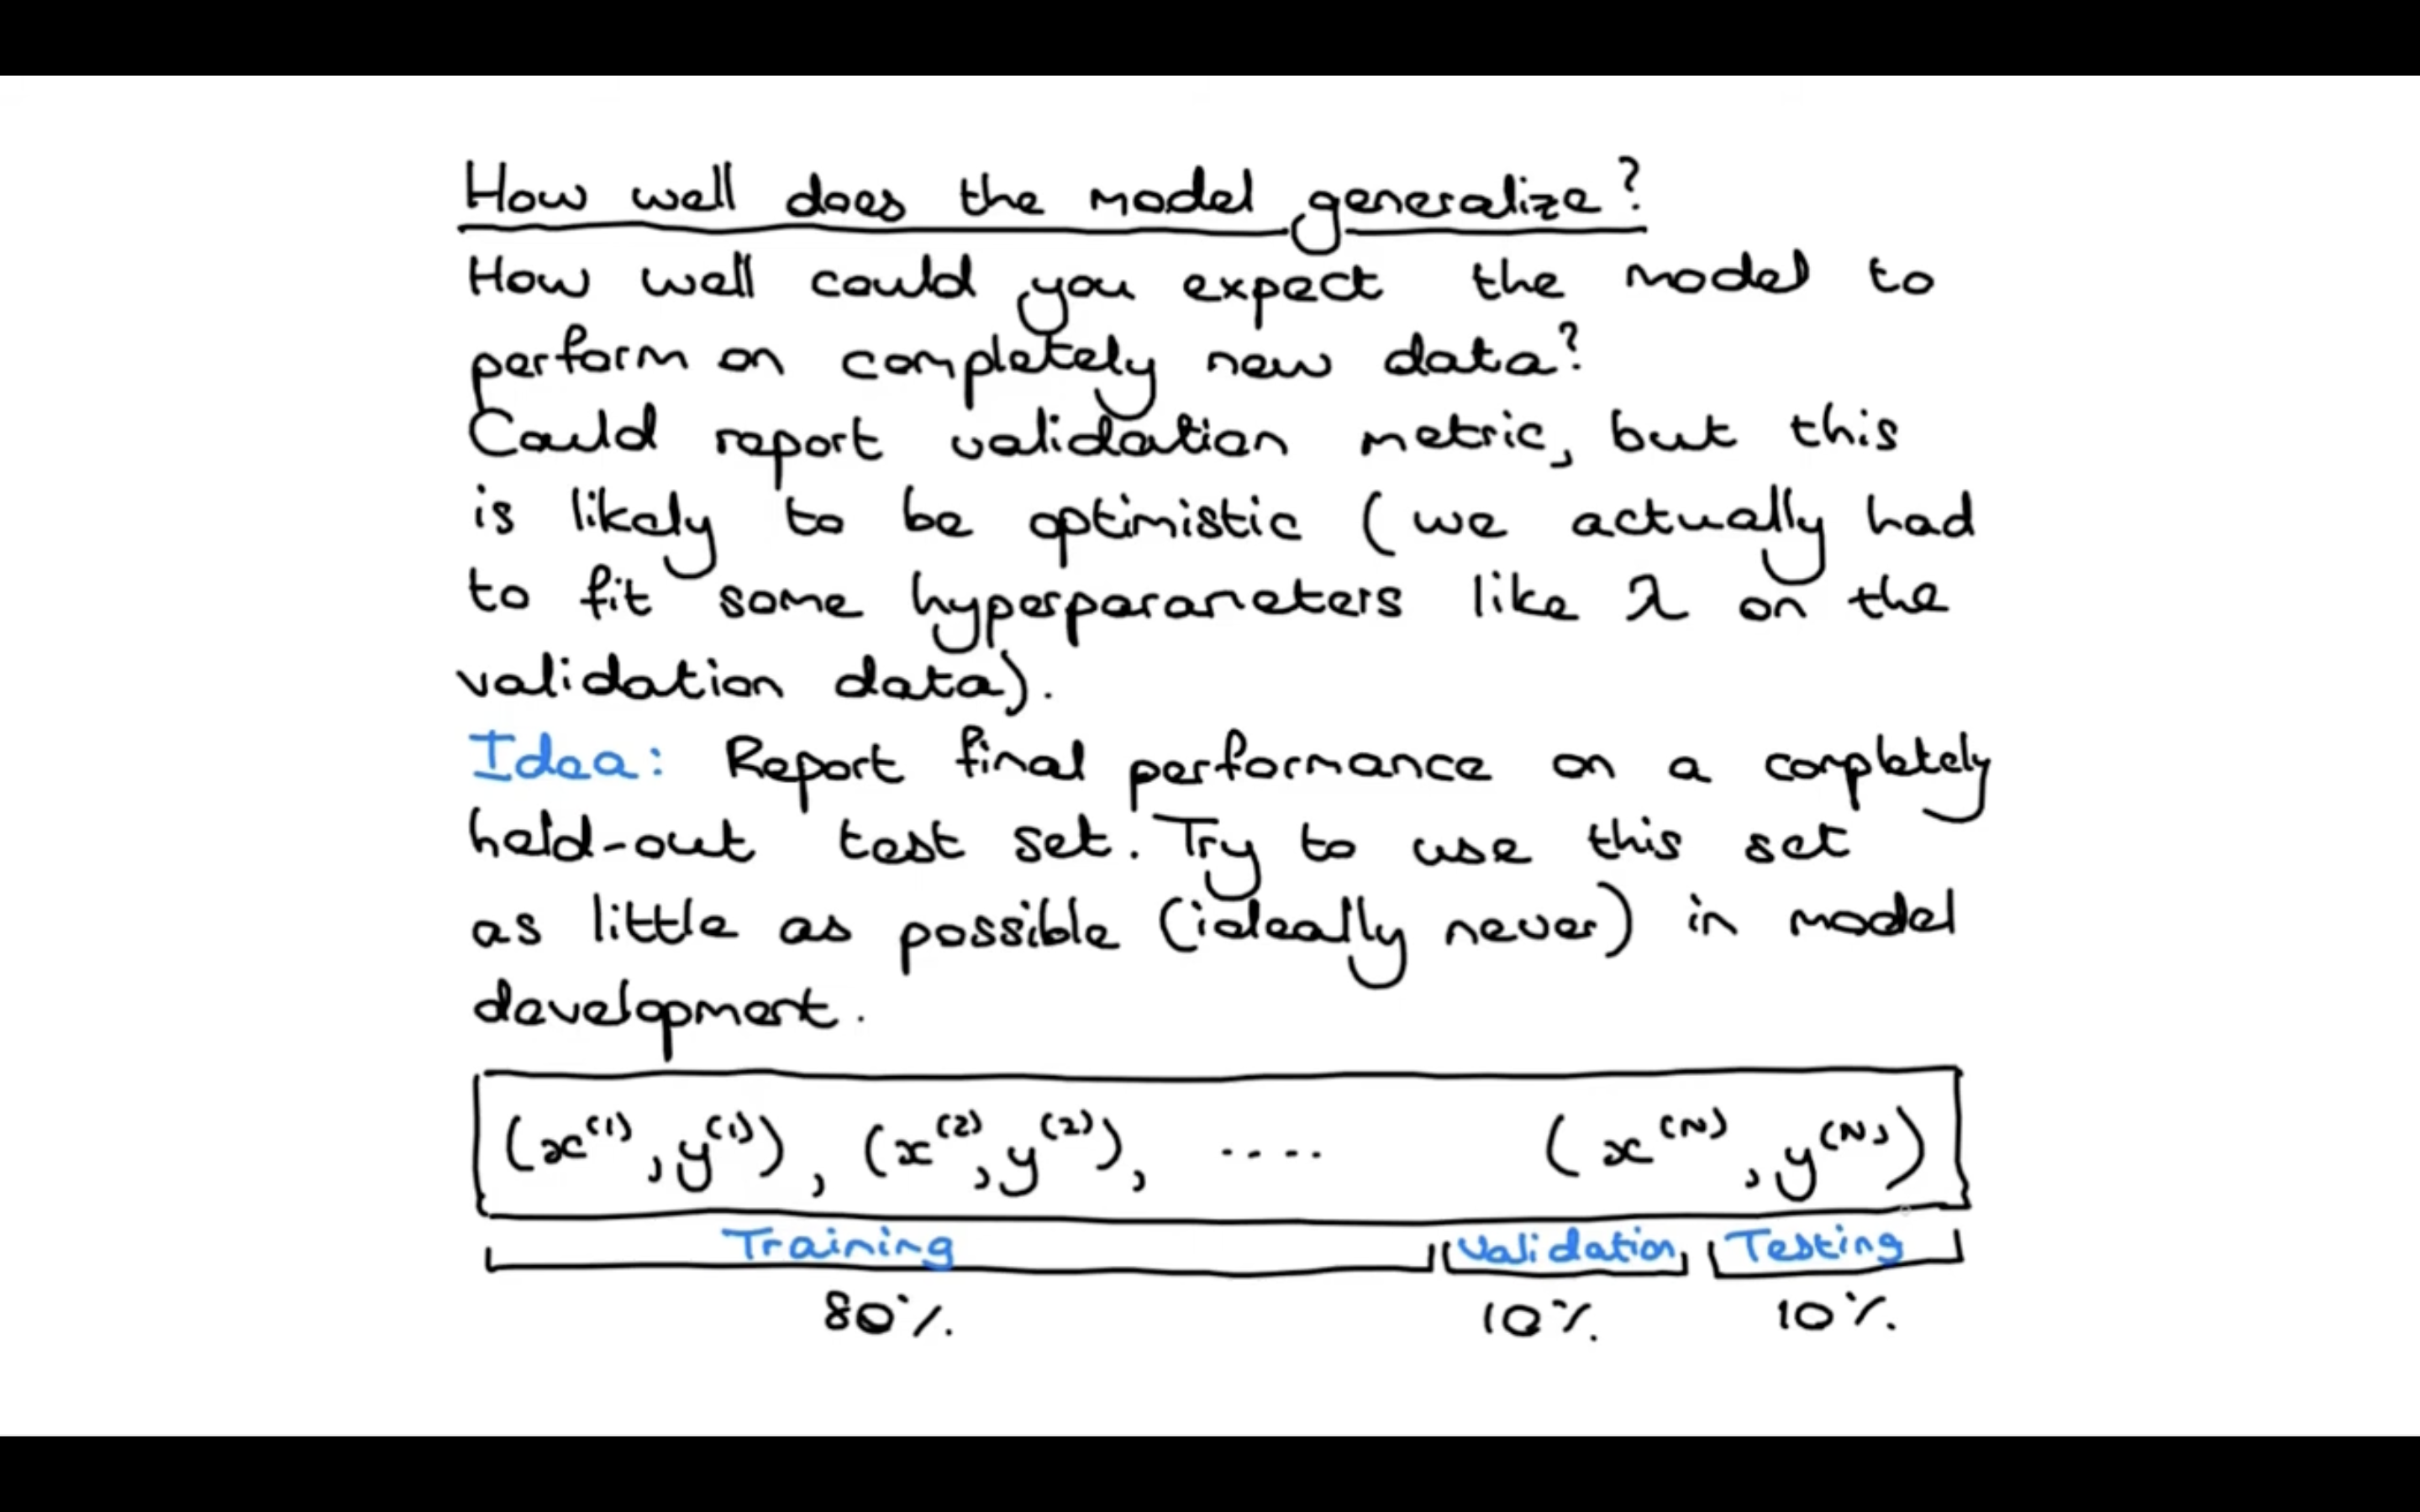

In [ ]:

import pandas as pd
print